In [1]:
import msprime
import tskit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = msprime.simulate(
    sample_size=50, Ne=1000, length=50e3, mutation_rate=5e-7, random_seed=30)
tree = ts.first()
for site in tree.sites():
    for mutation in site.mutations:
        print("Mutation @ position {:.2f} over node {}".format(site.position, mutation.node))
print(tree.draw(format="unicode"))
for variant in ts.variants():
    print(variant.site.id, variant.site.position, variant.alleles, variant.genotypes, sep="\t")



Mutation @ position 113.85 over node 90
Mutation @ position 182.02 over node 74
Mutation @ position 265.17 over node 90
Mutation @ position 286.79 over node 95
Mutation @ position 714.83 over node 92
Mutation @ position 892.11 over node 82
Mutation @ position 1292.24 over node 48
Mutation @ position 1389.46 over node 9
Mutation @ position 1550.07 over node 97
Mutation @ position 1813.62 over node 45
Mutation @ position 1941.14 over node 95
Mutation @ position 1986.44 over node 97
Mutation @ position 2021.77 over node 97
Mutation @ position 2056.01 over node 8
Mutation @ position 2178.50 over node 95
Mutation @ position 2257.92 over node 11
Mutation @ position 2459.61 over node 96
Mutation @ position 2521.54 over node 38
Mutation @ position 2532.70 over node 28
Mutation @ position 2628.81 over node 59
Mutation @ position 2798.75 over node 11
Mutation @ position 2885.26 over node 89
Mutation @ position 2900.08 over node 95
Mutation @ position 2959.25 over node 92
Mutation @ position 3153

In [3]:
afs = ts.allele_frequency_spectrum(polarised=True, span_normalise=False)
x=np.arange(len(afs))
print(afs)
sum(afs)
#ask about folded vs unfolded
#why does the sum = number of mutations? shouldn't it equal the sample size?   

[ 0. 77. 28. 15. 15. 28.  0.  4.  5.  0. 13. 28.  0.  0. 11.  0.  0.  0.
  0. 19. 55.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


318.0

(0.4, 51.0)

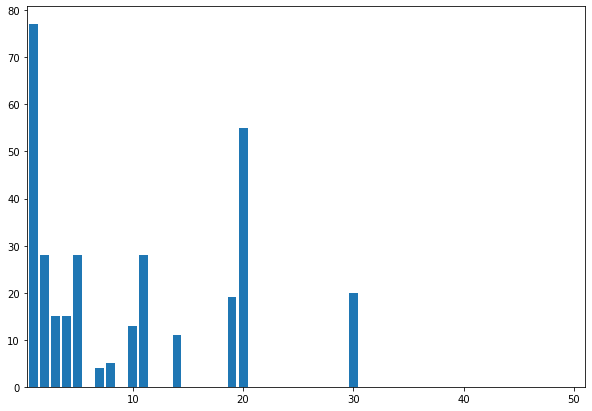

In [4]:
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x,afs)
plt.xlim(0.4,len(afs))


In [5]:
afs = ts.allele_frequency_spectrum([[0, 1, 2]], mode="branch", polarised=True)
print(afs)
print("sum afs          = ", np.sum(afs))
print("total branch len = ", tree.total_branch_length)
# afs[0] is the total branch length over all samples that are not in this sample set.

[10039.61046584   883.41366911   326.91001228  2305.28270942]
sum afs          =  13555.21685664577
total branch len =  13555.216856645768


In [35]:
population_configurations= [msprime.PopulationConfiguration(sample_size=20),msprime.PopulationConfiguration(sample_size=20),msprime.PopulationConfiguration(sample_size=20)]
m=0.5
#m=migration rate 
migration_matrix = [
    [0,m,m],
    [m,0,m],
    [m,m,0]]
ts2 = msprime.simulate(Ne=1000, length=50e3, population_configurations=population_configurations, migration_matrix=migration_matrix, mutation_rate=5e-7, random_seed=30)
tree = ts2.first()
for site in tree.sites():
    for mutation in site.mutations:
        print("Mutation @ position {:.2f} over node {}".format(site.position, mutation.node))
print(tree.draw(format="unicode"))
for variant in ts2.variants():
    print(variant.site.id, variant.site.position, variant.alleles, variant.genotypes, sep="\t")
    


Mutation @ position 50.91 over node 110
Mutation @ position 55.92 over node 114
Mutation @ position 59.59 over node 113
Mutation @ position 97.91 over node 113
Mutation @ position 135.79 over node 113
Mutation @ position 157.63 over node 21
Mutation @ position 182.81 over node 104
Mutation @ position 188.25 over node 113
Mutation @ position 212.95 over node 110
Mutation @ position 313.28 over node 112
Mutation @ position 323.54 over node 62
Mutation @ position 357.15 over node 107
Mutation @ position 419.24 over node 113
Mutation @ position 427.13 over node 89
Mutation @ position 470.41 over node 113
Mutation @ position 631.75 over node 26
Mutation @ position 639.05 over node 111
Mutation @ position 644.45 over node 109
Mutation @ position 720.48 over node 85
Mutation @ position 745.50 over node 107
Mutation @ position 825.40 over node 116
Mutation @ position 911.66 over node 105
Mutation @ position 933.61 over node 116
Mutation @ position 1062.70 over node 115
Mutation @ position 1099

In [26]:
afs2 = ts2.allele_frequency_spectrum(polarised=True, span_normalise=False)
x=np.arange(len(afs2))
print(afs2)
sum(afs2)


[  0. 197. 109. 101.  29.  90.  80.   5. 159.  45.   0.   5.  12.   0.
   0. 255.   0. 184.   0.   0.  70.   0.   0.   0.   0.   0.   0.   0.
  25.   0.   0.   0.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


1369.0

(0.4, 61.0)

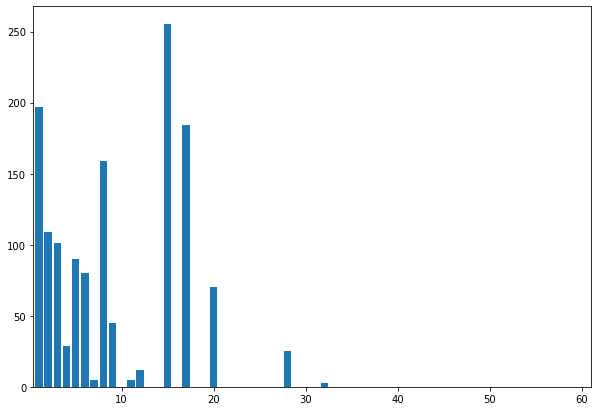

In [27]:
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x,afs2)
plt.xlim(0.4,len(afs2))